In [1]:
library(nortest)
library(readxl)
library(dplyr)
library(stringr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
Victoria_primaria <- read_excel("C:/Users/ayrto/OneDrive/Escritorio/Exploración de Datos Multivariados/1 - Trabajo Practico/VICTORIA_BASE_PRIMARIA_LIMPIA.xlsx")
Victoria_secundaria <- read_excel("C:/Users/ayrto/OneDrive/Escritorio/Exploración de Datos Multivariados/1 - Trabajo Practico/VICTORIA_BASE_SECUNDARIA_LIMPIA.xlsx")

In [5]:
Victoria_primaria_tercero_publica <- filter(Victoria_primaria, asignatura == "MATEMATICA" & Año_curso == "TERCERO" & ModEnseñanza == "Comun" & EsPrivada == "N")
Victoria_primaria_tercero_privada <- filter(Victoria_primaria, asignatura == "MATEMATICA" & Año_curso == "TERCERO" & ModEnseñanza == "Comun" & EsPrivada == "S")
Victoria_primaria_tercero_tecnica <- filter(Victoria_primaria, asignatura == "MATEMATICA" & Año_curso == "TERCERO" & ModEnseñanza == "Técnica")

In [16]:
Prom_tercero_publica <- mean(Victoria_primaria_tercero_publica$Promedio, na.rm = TRUE)
sd_tercero_publica <- sd(Victoria_primaria_tercero_publica$Promedio, na.rm = TRUE)
"MATEMATICA --> TERCERO PUBLICA COMUN"
print(paste("Promedio en Matemáticas:", round(Prom_tercero_publica, 2)))
print(paste("Desviación estándar en Matemáticas:", round(sd_tercero_publica, 2)))

Prom_tercero_privada <- mean(Victoria_primaria_tercero_privada$Promedio, na.rm = TRUE)
sd_tercero_privada <- sd(Victoria_primaria_tercero_privada$Promedio, na.rm = TRUE)
"MATEMATICA --> TERCERO PRIVADA COMUN"
print(paste("Promedio en Matemáticas:", round(Prom_tercero_privada, 2)))
print(paste("Desviación estándar en Matemáticas:", round(sd_tercero_privada, 2)))

Prom_tercero_tecnica <- mean(Victoria_primaria_tercero_tecnica$Promedio, na.rm = TRUE)
sd_tercero_tecnica <- sd(Victoria_primaria_tercero_tecnica$Promedio, na.rm = TRUE)
"MATEMATICA --> TERCERO TÉCNICA"
print(paste("Promedio en Matemáticas:", round(Prom_tercero_tecnica, 2)))
print(paste("Desviación estándar en Matemáticas:", round(sd_tercero_tecnica, 2)))

[1] "MATEMATICA --> TERCERO PUBLICA COMUN"

[1] "Promedio en Matemáticas: 7.48"
[1] "Desviación estándar en Matemáticas: 1.28"


[1] "MATEMATICA --> TERCERO PRIVADA COMUN"

[1] "Promedio en Matemáticas: 8.49"
[1] "Desviación estándar en Matemáticas: 0.93"


[1] "MATEMATICA --> TERCERO TÉCNICA"

[1] "Promedio en Matemáticas: NaN"
[1] "Desviación estándar en Matemáticas: NA"


In [15]:
promedio_muestra <- 4
z_tercero_publica <- (promedio_muestra - Prom_tercero_publica)/sd_tercero_publica
print(z_tercero_publica)

z_tercero_privada <- (promedio_muestra - Prom_tercero_privada)/sd_tercero_privada
print(z_tercero_privada)

z_tercero_tecnica <- (promedio_muestra - Prom_tercero_tecnica)/sd_tercero_tecnica
print(z_tercero_tecnica)

[1] -2.713903
[1] -4.849316
[1] NaN


In [18]:
Victoria_primaria_primero <- filter(Victoria_primaria, asignatura == "MATEMATICA" & Año_curso == "PRIMERO")
table(Victoria_primaria_primero$CodigoUnicoEscolar)


9000291 9000753 9000756 9000759 9001791 9003555 9003561 9004011 9004017 9004020 
      3      16      16      92       8       4      83      31      59      22 
9005391 9005394 9005397 9005403 9005406 9006249 
     30      42      33       1      80      44 

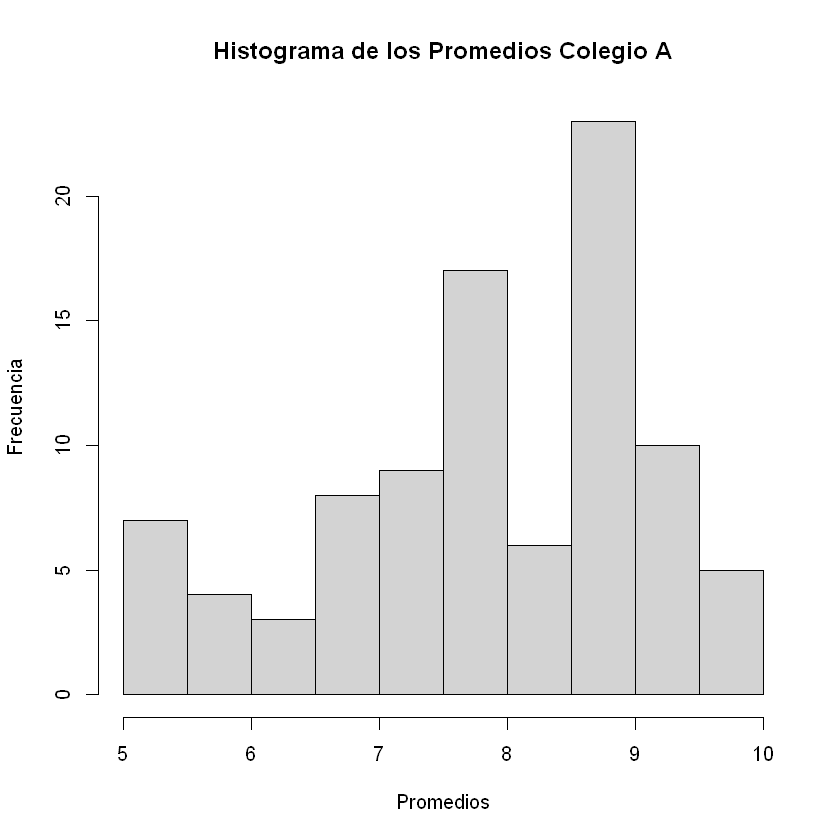

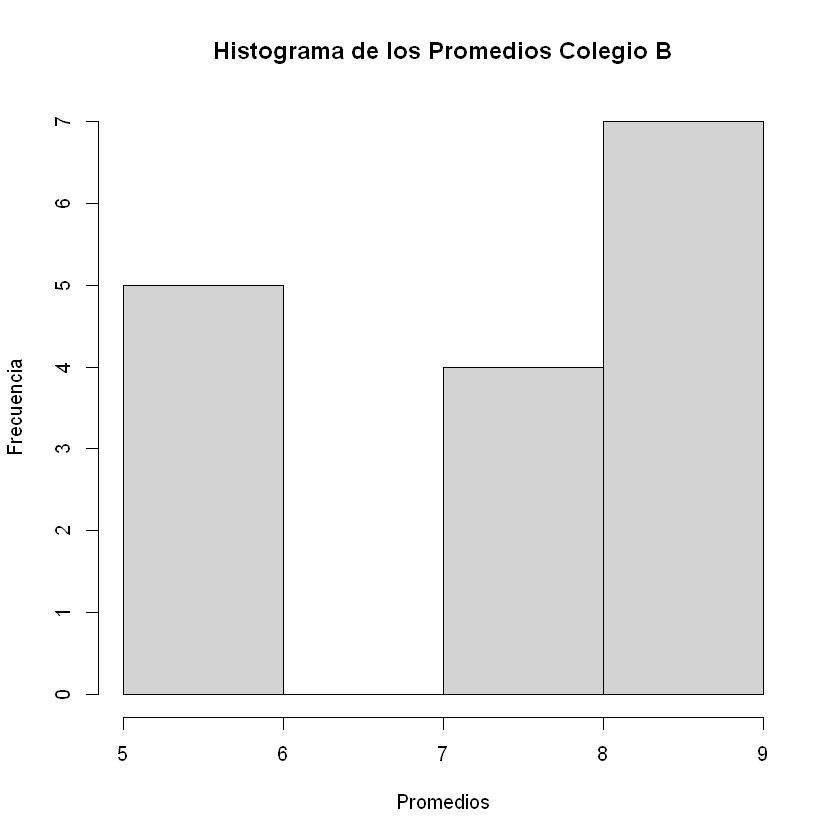

In [20]:
colegio_A <- filter(Victoria_primaria_primero, CodigoUnicoEscolar == "9000759")
colegio_B <- filter(Victoria_primaria_primero, CodigoUnicoEscolar == "9000753")
hist(colegio_A$Promedio, main = "Histograma de los Promedios Colegio A", xlab = "Promedios", ylab = "Frecuencia")
hist(colegio_B$Promedio, main = "Histograma de los Promedios Colegio B", xlab = "Promedios", ylab = "Frecuencia")

In [23]:
calificacion = 4
promedio_colegio_A <- mean(colegio_A$Promedio, na.rm = TRUE)
sd_colegio_A <- sd(colegio_A$Promedio, na.rm = TRUE)
z_colegio_A <- (calificacion - promedio_colegio_A)/sd_colegio_A
print(paste("Colegio_A:", round(z_colegio_A, 2)))

promedio_colegio_B <- mean(colegio_B$Promedio, na.rm = TRUE)
sd_colegio_B <- sd(colegio_B$Promedio, na.rm = TRUE)
z_colegio_B <- (calificacion - promedio_colegio_B)/sd_colegio_B
print(paste("Colegio_B:", round(z_colegio_B, 2)))

[1] "Colegio_A: -2.99"
[1] "Colegio_B: -2.02"


In [34]:
Victoria_primaria_primero_mat <- filter(Victoria_primaria, asignatura == "MATEMATICA" & Año_curso == "PRIMERO" & ModEnseñanza == "Comun")
Victoria_primaria_primero_len <- filter(Victoria_primaria, asignatura == "LENGUA" & Año_curso == "PRIMERO" & ModEnseñanza == "Comun")

In [39]:
# Realizar la prueba de Kolmogorov-Smirnov para la normalidad
ks.test(Victoria_primaria_primero_mat$Promedio, "pnorm")
ks.test(Victoria_primaria_primero_len$Promedio, "pnorm")

Warning message in ks.test(Victoria_primaria_primero_mat$Promedio, "pnorm"):
"ties should not be present for the Kolmogorov-Smirnov test"



	One-sample Kolmogorov-Smirnov test

data:  Victoria_primaria_primero_mat$Promedio
D = 1, p-value < 2.2e-16
alternative hypothesis: two-sided


Warning message in ks.test(Victoria_primaria_primero_len$Promedio, "pnorm"):
"ties should not be present for the Kolmogorov-Smirnov test"



	One-sample Kolmogorov-Smirnov test

data:  Victoria_primaria_primero_len$Promedio
D = 1, p-value < 2.2e-16
alternative hypothesis: two-sided


In [40]:
# Realizar la prueba de Anderson-Darling para la normalidad
ad.test(Victoria_primaria_primero_mat$Promedio)
ad.test(Victoria_primaria_primero_len$Promedio)


	Anderson-Darling normality test

data:  Victoria_primaria_primero_mat$Promedio
A = 8.2321, p-value < 2.2e-16



	Anderson-Darling normality test

data:  Victoria_primaria_primero_len$Promedio
A = 8.5373, p-value < 2.2e-16


In [41]:
# Realizar el test de Lilliefors para la normalidad
lillie.test(Victoria_primaria_primero_mat$Promedio)
lillie.test(Victoria_primaria_primero_len$Promedio)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  Victoria_primaria_primero_mat$Promedio
D = 0.11517, p-value < 2.2e-16



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  Victoria_primaria_primero_len$Promedio
D = 0.11955, p-value < 2.2e-16


In [42]:
shapiro.test(Victoria_primaria_primero_mat$Promedio)
shapiro.test(Victoria_primaria_primero_len$Promedio)


	Shapiro-Wilk normality test

data:  Victoria_primaria_primero_mat$Promedio
W = 0.94428, p-value = 1.745e-13



	Shapiro-Wilk normality test

data:  Victoria_primaria_primero_len$Promedio
W = 0.94295, p-value = 1.068e-13


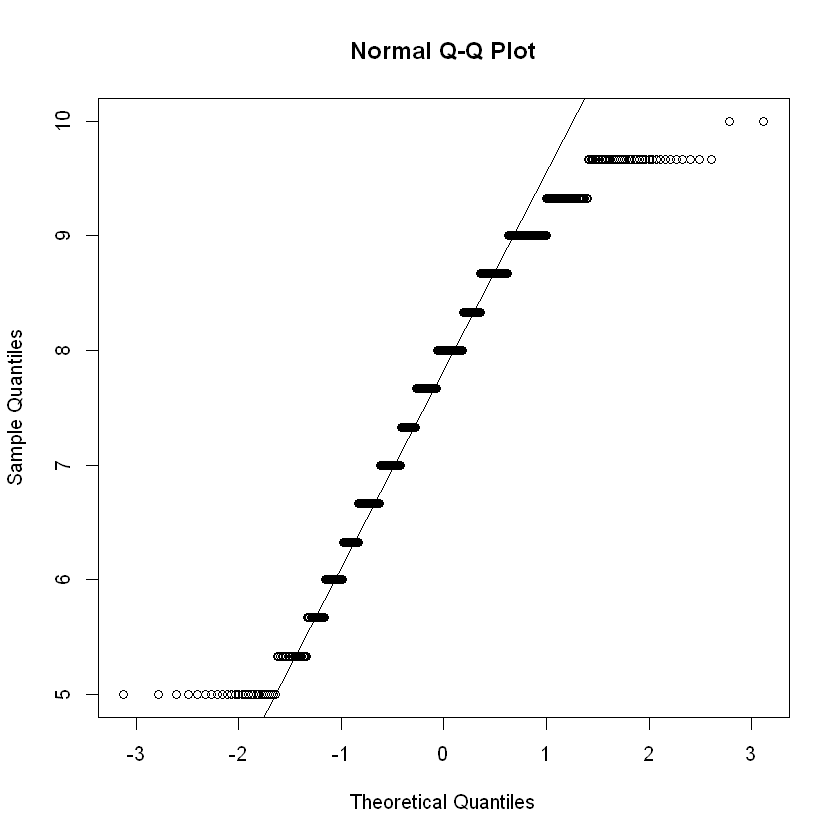

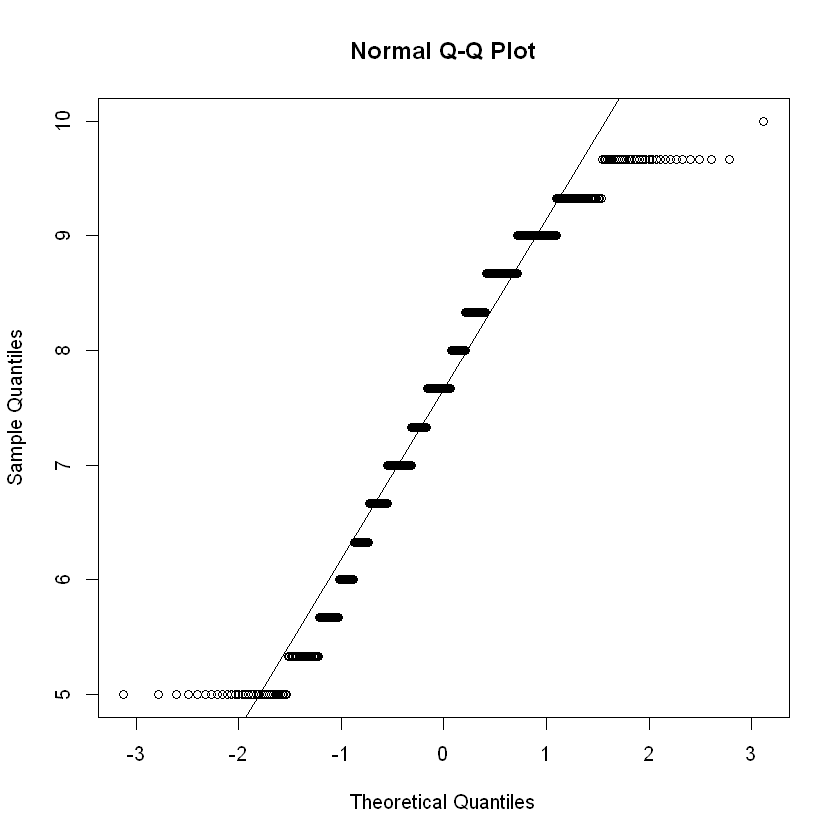

In [43]:
qqnorm(as.numeric(Victoria_primaria_primero_mat[!is.na(Victoria_primaria_primero_mat$Promedio),]$Promedio))
qqline(as.numeric(Victoria_primaria_primero_mat[!is.na(Victoria_primaria_primero_mat$Promedio),]$Promedio))

qqnorm(as.numeric(Victoria_primaria_primero_len[!is.na(Victoria_primaria_primero_len$Promedio),]$Promedio))
qqline(as.numeric(Victoria_primaria_primero_len[!is.na(Victoria_primaria_primero_len$Promedio),]$Promedio))

In [44]:
estandar_mat <- scale(Victoria_primaria_primero_mat$Promedio)
estandar_len <- scale(Victoria_primaria_primero_len$Promedio)

In [49]:
shapiro.test(estandar_mat)
shapiro.test(estandar_len)


	Shapiro-Wilk normality test

data:  estandar_mat
W = 0.94428, p-value = 1.745e-13



	Shapiro-Wilk normality test

data:  estandar_len
W = 0.94295, p-value = 1.068e-13


In [50]:
lillie.test(estandar_mat)
lillie.test(estandar_len)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  estandar_mat
D = 0.11517, p-value < 2.2e-16



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  estandar_len
D = 0.11955, p-value < 2.2e-16


In [51]:
# Realizar la prueba de Anderson-Darling para la normalidad
ad.test(estandar_mat)
ad.test(estandar_len)


	Anderson-Darling normality test

data:  estandar_mat
A = 8.2321, p-value < 2.2e-16



	Anderson-Darling normality test

data:  estandar_len
A = 8.5373, p-value < 2.2e-16


In [52]:
# Realizar la prueba de Kolmogorov-Smirnov para la normalidad
ks.test(estandar_mat, "pnorm")
ks.test(estandar_len, "pnorm")

Warning message in ks.test(estandar_mat, "pnorm"):
"ties should not be present for the Kolmogorov-Smirnov test"



	One-sample Kolmogorov-Smirnov test

data:  estandar_mat
D = 0.11517, p-value = 9.72e-07
alternative hypothesis: two-sided


Warning message in ks.test(estandar_len, "pnorm"):
"ties should not be present for the Kolmogorov-Smirnov test"



	One-sample Kolmogorov-Smirnov test

data:  estandar_len
D = 0.11955, p-value = 2.974e-07
alternative hypothesis: two-sided
